In [50]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        diff = current_width - new_value
        patch.set_x(patch.get_x() + diff * .5)
def get_ci(samples, confidence=0.95): return stats.sem(samples) * stats.t.ppf((1 + confidence) / 2., len(samples)-1)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
data = "wv_linear_sm_0"
data_dir = f"syn_results/{data}/"
assert(os.path.isdir(data_dir))

In [52]:
RESN_50 = pd.read_csv(data_dir + "/d=50/" + "RESN.csv")
RESN_512 = pd.read_csv(data_dir + "/d=512/" + "RESN.csv")
filtered_50 = pd.read_csv(data_dir + "/d=50/" + data + "_filtered_d50.csv")
filtered_512 = pd.read_csv(data_dir + "/d=512/" + data + "_filtered_d512.csv")
unfiltered_50 = pd.read_csv(data_dir + "/d=50/" + data + "_unfiltered_d50.csv")
unfiltered_512 = pd.read_csv(data_dir + "/d=512/" + data + "_unfiltered_d512.csv")

In [ ]:
RESN_df = RESN_512
df = filtered_50

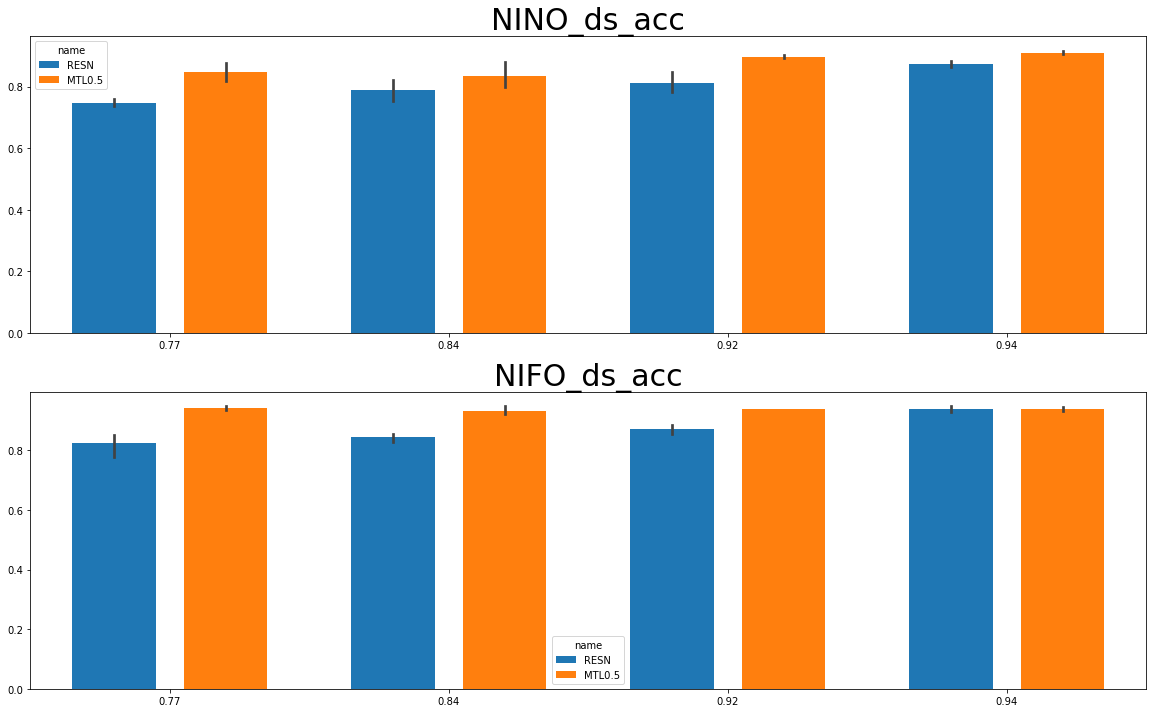

In [57]:
df = pd.concat([RESN_df,df])
fig, ax = plt.subplots(2,1, figsize=(20, 6*2))
for i, metric in enumerate(["NINO_ds_acc", "NIFO_ds_acc"]):
    x="align"
    y=metric
    sns.barplot(ax=ax[i],data=df, x=x,y=y,hue="name",
    saturation=1, hue_order=["RESN","MTL0.5"])
    ax[i].set_title(y,fontsize=30)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    change_width(ax[i], .3)
    # plt.savefig(fig_dir + "wv_3d_linear_filtered.pdf")


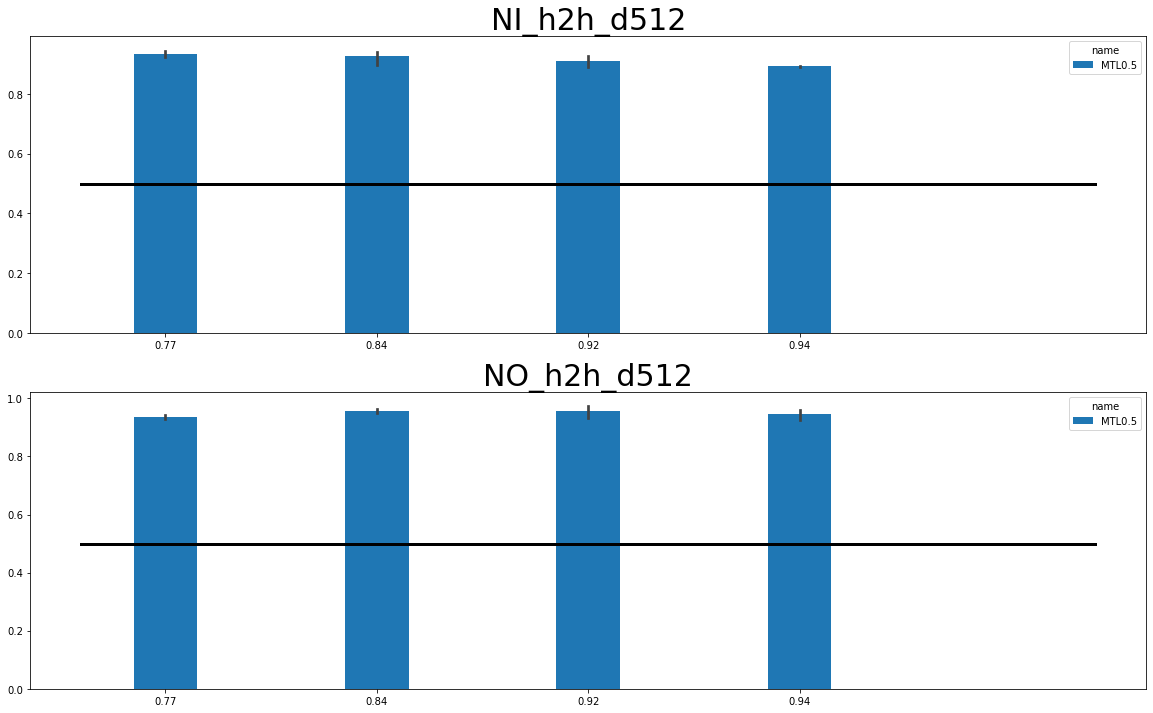

In [58]:
df = pd.concat([RESN_df,df])
fig, ax = plt.subplots(2,1, figsize=(20, 6*2))
for i, metric in enumerate(["NI_h2h_d512", "NO_h2h_d512"]):
    x="align"
    y=metric
    sns.barplot(ax=ax[i],data=df, x=x,y=y,hue="name",
    saturation=1, hue_order=["MTL0.5"])
    x_ticks = np.arange(-0.4,4.5,0.1)
    ax[i].plot(x_ticks, [0.5]*len(x_ticks), c="k", lw=3)
    ax[i].set_title(y,fontsize=30)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    change_width(ax[i], .3)
    # plt.savefig(fig_dir + "wv_3d_linear_filtered.pdf")


## filtered h2h

In [5]:
from plot import *
from plot.font import palatino, palatino_bold
from matplotlib.patches import Rectangle
import matplotlib as mpl
import matplotlib.font_manager as font_manager
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams['axes.facecolor']='w'
plt.rcParams['font.family'] = 'serif'
# path = '/Users/chenchacha/2022_neurips_triplet/data/plot/font/palatino_bold.ttf'
# prop = font_manager.FontProperties(fname=path)
# mpl.rcParams['font.family'] = prop.get_name()
# plt.rcParams['font.weight'] = 'semibold'
ting_colors = ['#E34638','#333399','#34ace0']

label_fs = 30
tick_fs = 30

In [25]:
dir = "../figures/supp"
data = "wv_square"

In [26]:
means_df = pd.read_csv("main_fig_data/filtered_NINO.csv")
ci_df = pd.read_csv("main_fig_data/filtered_NINO_ci.csv")
cols = means_df.columns

In [39]:
f_means = filtered_512[filtered_512["name"]=="MTL0.5"].groupby("align").mean()["NI_h2h_d512"].to_numpy()
uf_means = unfiltered_512[unfiltered_512["name"]=="MTL0.5"].groupby("align").mean()["NI_h2h_d512"].to_numpy()
f_cis = filtered_512[filtered_512["name"]=="MTL0.5"].groupby("align").agg(get_ci)["NI_h2h_d512"].to_numpy()
uf_cis = unfiltered_512[unfiltered_512["name"]=="MTL0.5"].groupby("align").agg(get_ci)["NI_h2h_d512"].to_numpy()

/home/tianh/.conda/envs/han/lib/python3.7/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


In [40]:
means_df = pd.DataFrame(np.vstack([uf_means,f_means]),columns=cols[1:])
means_df.insert(0, "model", ["MTL","MTL_filtered"])
cis_df = pd.DataFrame(np.vstack([uf_cis,f_cis]),columns=cols[1:])
cis_df.insert(0, "model", ["MTL","MTL_filtered"])

In [41]:
out = os.path.join(dir,data)
out += "_NI-h2h_filter"

/home/tianh/.conda/envs/han/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


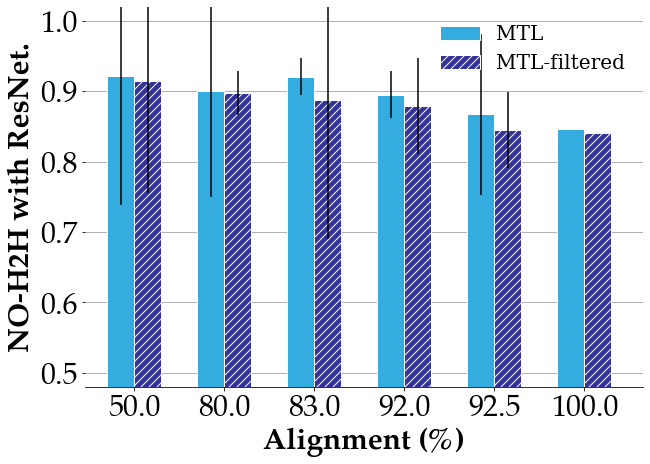

In [42]:

aligns = means_df.columns[1:]
df = means_df
models = ["MTL","MTL_filtered"]
# models
color_dict = {"MTL": ting_colors[2], "TN": ting_colors[2], "RESN": ting_colors[1], "": '#50C878',
                "MTL_filtered": ting_colors[1], "TN_filtered": '#50C878'}

# tick_fs = 32
i_fig, i_ax = plt.subplots(1, 1, figsize=(10,7))
fig = Figure(eval, fig=i_fig, ax=i_ax)
fig.set_axis_label('x', 'Alignment (%)',fontsize=label_fs)
fig.set_axis_label('y', 'NO-H2H with ResNet.',fontsize=label_fs)
fig.set_axis_lim('x', lim=[-0.5, 5.6], piece=7, margin=[0.05, 0.05],
                        _format='%.2f')
anchors = np.arange(len(aligns))
fig.ax.set_xticks(anchors)
fig.ax.set_xticklabels([float(a)*100 for a in aligns], fontsize=tick_fs)
fig.set_axis_lim('y', lim=[0.48, 1.02], labels =np.arange(5,11,1)/10, piece=4,
                _format='%.2f', fontsize=tick_fs)
# fig.ax.set_yticklabels(fontproperties=palatino_bold, fontsize=tick_fs)
fig.ax.grid(True,zorder=0,axis='y')#,axis='x')

start = 0.1
width = 0.3

settings = models
patterns = [None, "///", None, "///"]
labels = ['Unfiltered','Filtered']
color_list = [color_dict[m] for m in models]


for i, align in enumerate(aligns):
        align_df = df
        for j, model in enumerate(models):
                fig.bar(anchors[i]-1*width+j*width,
                        df[(df["model"]==model)][align],
                        width=width, color = color_list[j],  hatch=patterns[j], alpha=1, label=settings[j]
                ,yerr = ci_df[(ci_df["model"] == model)][align].to_numpy()[0])#label=settings[j],
                        # yerr=ci_df[(ci_df["Model"]==model) & (ci_df['align']==align)][eval].to_numpy()[0])
                # fig.ax.legend()
        # fig.set_legend()
        start = start+j*width+width*4
# plt.legend()
# for j, model in enumerate(models):
j, model = 0, models[0]
rect1 = fig.bar(anchors[i] - 1 * width + j * width,
        df[(df["model"] == model)][align],
        width=width, color=color_list[j], hatch=patterns[j], alpha=1, label=settings[j],
                yerr = ci_df[(ci_df["model"] == model)][align].to_numpy()[0])  # label=settings[j],
j, model = 1, models[1]
rect2 = fig.bar(anchors[i] - 1 * width + j * width,
        df[(df["model"] == model)][align],
        width=width, color=color_list[j], hatch=patterns[j], alpha=1, label=settings[j],
                yerr=ci_df[(ci_df["model"] == model)][align].to_numpy()[0])  # label=settings[j],

hatches = [None, '/']
handles = [Rectangle((0,0),2,1,color=c, alpha=0.85,  hatch=h, edgecolor='white') for c,h in zip(color_list[:2],hatches)]
# params = {'legend.fontsize': 32,
#           'legend.handlelength': 5}
# import pylab as plot
# plot.rcParams.update(params)

# fig.ax.legend(handles, ['MTL','MTL-filtered'],fontsize=18, loc='upper left', ncol=1, frameon=False)
fig.ax.legend( (rect1[0], rect2[0]), ['MTL','MTL-filtered'], ncol=1, fontsize = 20,frameon=False,loc='upper right')
# ax.legend((rects1[0], rects2[0], rects3[0]), ['UNITE-G-D', 'UNITE-G', 'UNITE'],
        # ncol=1, fontsize=13, frameon=False, loc='upper left')
fig.fig.savefig(f"{out}.pdf", dpi=100,bbox_inches='tight')
# fig.fig.show()

#### noise unfiltered

In [6]:
color_dict = {"MTL":ting_colors[0],"TN":ting_colors[2],"RESN":ting_colors[1],"":'#50C878',
                    "MTL_filtered": ting_colors[1],"TN_filtered":'#50C878'}
                    

color_list = [ting_color['red'], ting_color['red_deep'], ting_color['yellow'],
                  ting_color['blue'], ting_color['blue_light'], ting_color['pink'], ting_color['green'], ]

In [51]:
noise_df = pd.read_csv("supp_data/noise_NINO_unfiltered.csv")
noise_df

,model,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,MTL,0.8275,0.8825,0.8575,0.7825,0.8825,0.7625,0.7175,0.7450
1,TN,0.8500,0.8050,0.8175,0.7925,0.7200,0.6550,0.7000,0.6525
2,RESN,0.7920,0.7920,0.7920,0.7920,0.7920,0.7920,0.7920,0.7920


In [52]:
noisy_unfiltered_512 = pd.read_csv("raw_data/link/wv_squarelin/d=512/wv_squarelin_noisy_unfiltered_d512.csv")
TN = noisy_unfiltered_512[noisy_unfiltered_512["name"]=="TN"].groupby("noise").mean()["NI_h2h_d512"].to_numpy()
MTL = noisy_unfiltered_512[noisy_unfiltered_512["name"]=="MTL0.5"].groupby("noise").mean()["NI_h2h_d512"].to_numpy()

In [53]:
data = noise_df.to_numpy()
for i, (t,m) in enumerate(zip(TN,MTL)):
    data[0][1:][i] = m
    data[1][1:][i] = t
noise_df = pd.DataFrame(data,columns=noise_df.columns)
noise_df

In [54]:
noise_df = pd.DataFrame(data,columns=noise_df.columns)
noise_df

,model,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8
0,MTL,0.890972,0.859861,0.791389,0.746944,0.612361,0.447083,0.427639,0.426806
1,TN,0.784444,0.764583,0.687917,0.577083,0.44125,0.34875,0.326111,0.303472
2,RESN,0.792,0.792,0.792,0.792,0.792,0.792,0.792,0.792


/home/tianh/.conda/envs/han/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


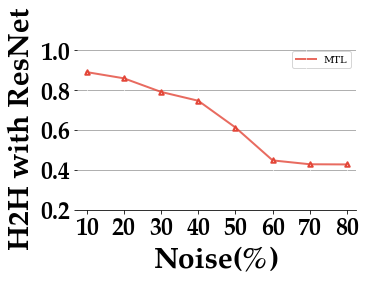

In [58]:
y_label = 'H2H with ResNet'
out = "wv_squarelin_noise_unfiltered_h2h"
models = ["MTL"]

noises = noise_df.columns[1:]
# models = noise_df["model"]
df = noise_df
i_fig, i_ax = plt.subplots(1, 1, figsize=(5,3))
fig = Figure(eval, fig=i_fig, ax=i_ax)
fig.set_axis_label('x', 'Noise(%)',fontsize=label_fs)
fig.set_axis_label('y',y_label  ,fontsize=label_fs)
fig.set_axis_lim('x', lim=[-0.2, 7.2], piece=len(noises)-1, margin=[0.05, 0.05],
                        _format='%.1f')
fig.ax.set_xticks(np.arange(len(noises)))
fig.ax.set_xticklabels([int(float(n)*100) for n in noises], fontsize=tick_fs)


fig.set_axis_lim('y', lim=[0.2,1.02], labels =np.arange(2,11,2)/10, piece=4,
                    _format='%d', fontsize=tick_fs)
plt.setp(fig.ax.get_yticklabels(), fontproperties=palatino_bold)
plt.setp(fig.ax.get_xticklabels(), fontproperties=palatino_bold)
plt.setp(fig.ax.get_yticklabels(), fontsize=24)
plt.setp(fig.ax.get_xticklabels(), fontsize=24)

color_list = [color_dict[m] for m in models]

for i, model in enumerate(models):
    x = noises
    y = np.array(df[df['model']==model].iloc[0][1:])
    fig.curve(x, y, marker="|", markersize=40, color=color_list[i], alpha=0.8, label=model)
    fig.scatter(x, y, color=color_list[i], marker='^', s=20)

# fig.set_legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', frameon=True, fontsize=18, ncol=3)
# fig.set_legend(loc='lower left', frameon=True, fontsize=16, ncol=1)
fig.fig.savefig(f"../figures/supp/{out}.pdf", dpi=100,bbox_inches='tight')
# fig.fig.show()

### num

In [77]:

ting_colors = ['#E34638','#333399','#34ace0'
]
color_dict = {"MTL":ting_colors[0],"TN":ting_colors[2],"RESN":ting_colors[1],"":'#50C878',
                    "MTL_filtered": ting_colors[1],"TN_filtered":'#50C878'}



color_list = [ting_color['red'], ting_color['red_deep'], ting_color['yellow'],
                  ting_color['blue'], ting_color['blue_light'], ting_color['pink'], ting_color['green'], ]

label_fs = 30
tick_fs = 30

In [130]:
num_df = pd.read_csv("supp_data/num_h2h.csv")
num_df

,model,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.0078125
0,MTL,0.816,0.806,0.782,0.754,0.678,0.620,0.622
1,TN,0.854,0.856,0.809,0.785,0.747,0.676,0.706


In [131]:
num_unfiltered_512 = pd.read_csv("raw_data/link/wv_squarelin/d=512/wv_squarelin_num_filtered_d512.csv")
TN = num_unfiltered_512[num_unfiltered_512["name"]=="TN"].groupby("num").mean()["NI_h2h_d512"].to_numpy()[::-1]
MTL = num_unfiltered_512[num_unfiltered_512["name"]=="MTL0.5"].groupby("num").mean()["NI_h2h_d512"].to_numpy()[::-1]

In [132]:
data = num_df.to_numpy()
for i, (t,m) in enumerate(zip(TN,MTL)):
    data[0][1:][i] = m
    data[1][1:][i] = t
num_df = pd.DataFrame(data,columns=num_df.columns)
num_df

,model,0.5,0.25,0.125,0.0625,0.03125,0.015625,0.0078125
0,MTL,0.909028,0.886528,0.845833,0.8325,0.809167,0.783611,0.756111
1,TN,0.770417,0.809028,0.734167,0.693611,0.677639,0.639167,0.593611


In [133]:
models = ["MTL"]
y_label = 'H2H with ResNet'
out = "wv_squarelin_num_h2h"

/home/tianh/.conda/envs/han/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


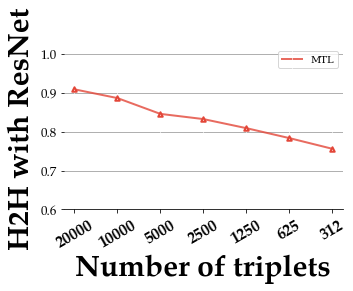

In [134]:
nums = num_df.columns[1:]
df = num_df

# %%

i_fig, i_ax = plt.subplots(1, 1, figsize=(5, 3))
fig = Figure(eval, fig=i_fig, ax=i_ax)
fig.set_axis_label('x', 'Number of triplets', fontsize=label_fs)
fig.set_axis_label('y', y_label, fontsize=label_fs)
fig.set_axis_lim('x', lim=[-0.2, 6.2], piece=len(nums) + 1, margin=[0.05, 0.05],
                    _format='%.1f')
fig.ax.set_xticks(np.arange(len(nums)))
fig.ax.set_xticklabels([int(float(x) * 40000) for x in nums])
plt.setp(fig.ax.get_yticklabels(), fontproperties=palatino_bold)
plt.setp(fig.ax.get_xticklabels(), fontproperties=palatino_bold)
plt.setp(fig.ax.get_yticklabels(), fontsize=24)
plt.setp(fig.ax.get_xticklabels(), rotation=30, fontsize=16)
fig.set_axis_lim('y', lim=[0.6,1.02], labels=np.arange(6,11,1)/10)
color_list = [color_dict[m] for m in models]

for i, model in enumerate(models):
    x = nums
    y = np.array(df[df['model'] == model].iloc[0][1:])
    fig.curve(x, y, marker="|", markersize=40, color=color_list[i], alpha=0.8, label=model)
    fig.scatter(x, y, color=color_list[i], marker='^', s=20)
# fig.set_legend(loc='lower right', frameon=True, fontsize=16, ncol=1)
fig.fig.savefig(f"../figures/supp/{out}.pdf", dpi=100, bbox_inches='tight')